In [ ]:
.import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/instagram_analysis_unique_users.xlsx')
df

,Username,Post_Type,Hashtag,Location,Device,Gender,Followers,Following,Likes,Comments,Shares,Saves,Views,Post_Date,Engagement_Rate
0,user_0001,Photo,#travel,Delhi,iPhone,Female,94931,72,1392,266,235,67,32450,2024-01-01,14.85
1,user_0002,Carousel,#art,Tokyo,Web,Other,92187,4028,2583,415,962,998,53579,2024-01-02,8.44
2,user_0003,Photo,#travel,Mumbai,Android,Female,83190,1219,6129,439,575,856,12359,2024-01-03,3.45
3,user_0004,Photo,#art,Paris,Web,Other,4293,3120,5117,197,838,223,14223,2024-01-04,14.05
4,user_0005,Carousel,#food,Tokyo,Android,Other,54988,3090,2959,428,216,544,9358,2024-01-05,9.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,user_1196,Carousel,#funny,Mumbai,Web,Other,43937,2848,4098,257,181,994,21947,2027-04-10,9.58
1196,user_1197,Carousel,#art,Tokyo,Android,Male,78447,1607,5148,358,104,729,56925,2027-04-11,1.08
1197,user_1198,Story,#music,Paris,Android,Female,39979,160,2419,32,983,907,94548,2027-04-12,10.83
1198,user_1199,Story,#fashion,Sydney,Web,Male,24507,3711,9517,453,305,576,51786,2027-04-13,14.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Username         1200 non-null   object        
 1   Post_Type        1200 non-null   object        
 2   Hashtag          1200 non-null   object        
 3   Location         1200 non-null   object        
 4   Device           1200 non-null   object        
 5   Gender           1200 non-null   object        
 6   Followers        1200 non-null   int64         
 7   Following        1200 non-null   int64         
 8   Likes            1200 non-null   int64         
 9   Comments         1200 non-null   int64         
 10  Shares           1200 non-null   int64         
 11  Saves            1200 non-null   int64         
 12  Views            1200 non-null   int64         
 13  Post_Date        1200 non-null   datetime64[ns]
 14  Engagement_Rate  1200 non-null   float64

In [ ]:
df = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 1200


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Gender'].duplicated().sum()

np.int64(1197)

In [ ]:
def conv(x):
    if x == 'Male':
        return 0
    elif x == 'Female':
        return 1
    else:
        return 2

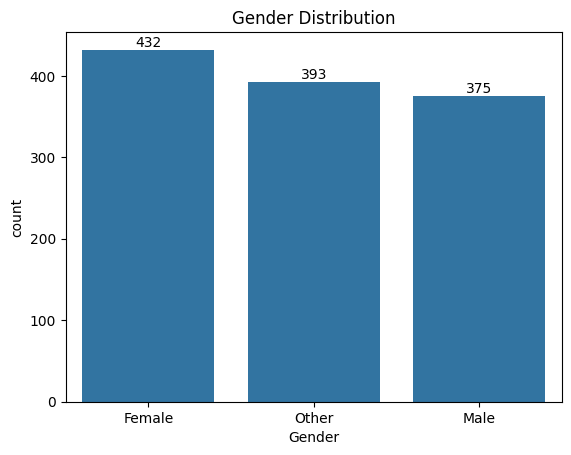

In [ ]:
ax = sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
ax.bar_label(ax.containers[0])
plt.show()

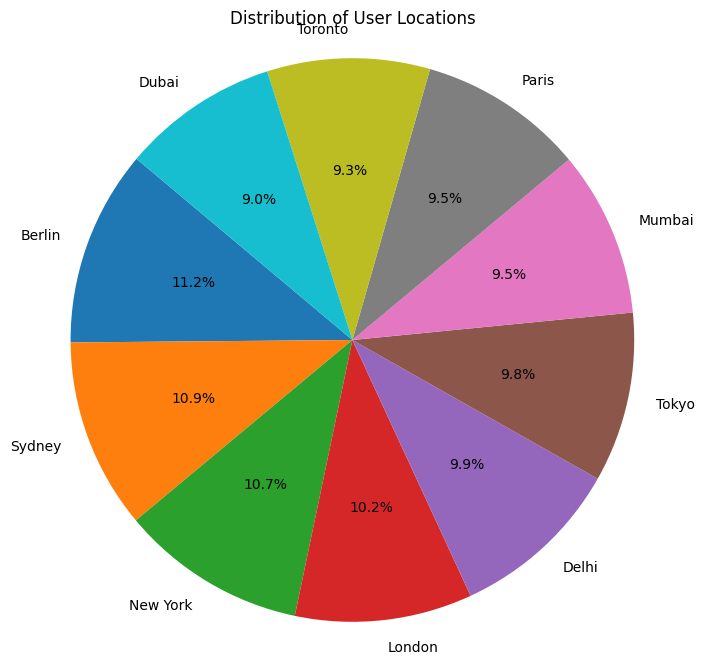

In [ ]:
location_counts = df['Location'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of User Locations')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

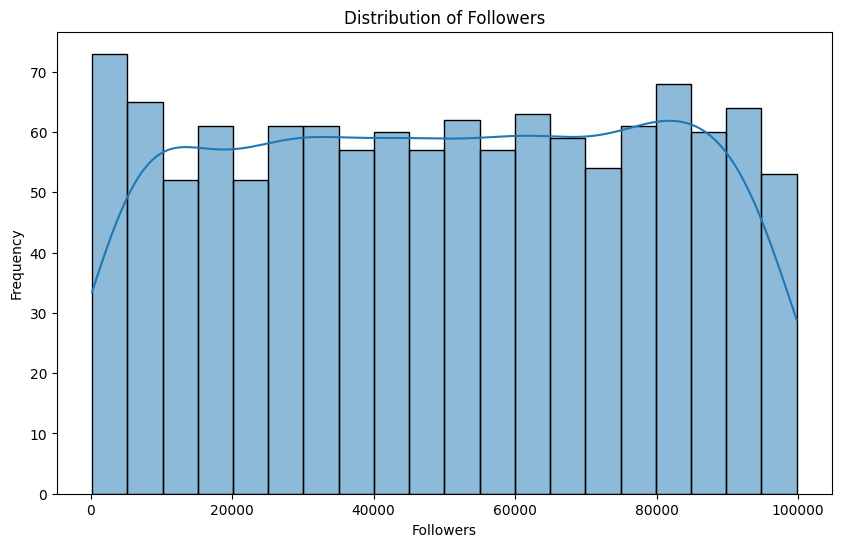

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Followers', data=df, bins=20, kde=True)
plt.title('Distribution of Followers')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.show()

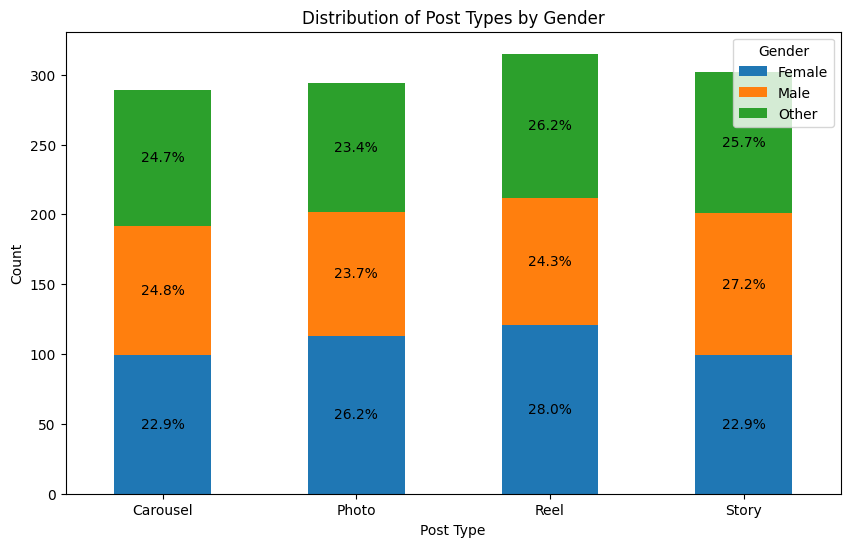

In [ ]:
# Create a crosstab of 'Post_Type' and 'Gender' to count the combinations
crosstab = pd.crosstab(df['Post_Type'], df['Gender'])

# Plot a stacked bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add percentage labels on each segment
for c in ax.containers:
    labels = [f'{w/c.datavalues.sum():0.1%}' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# Set the title and labels
plt.title('Distribution of Post Types by Gender')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Display the plot
plt.show()

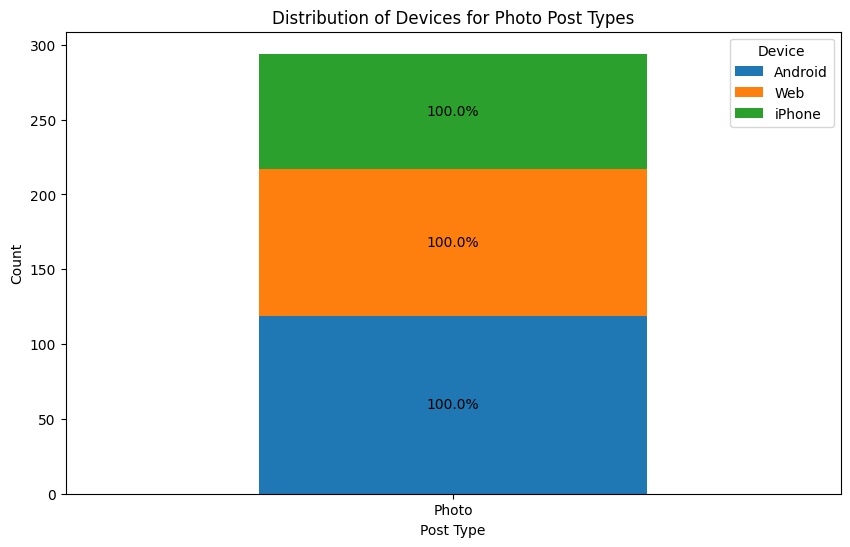

In [ ]:
# Filter the DataFrame for 'Photo' post types
photo_df = df[df['Post_Type'] == 'Photo']

# Create a crosstab of 'Post_Type' and 'Device' to count the combinations
crosstab_photo_device = pd.crosstab(photo_df['Post_Type'], photo_df['Device'])

# Plot a stacked bar chart
ax = crosstab_photo_device.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add percentage labels on each segment
for c in ax.containers:
    labels = [f'{w/c.datavalues.sum():0.1%}' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# Set the title and labels
plt.title('Distribution of Devices for Photo Post Types')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Device')

# Display the plot
plt.show()

In [ ]:
df.columns.values

array(['Username', 'Post_Type', 'Hashtag', 'Location', 'Device', 'Gender',
       'Followers', 'Following', 'Likes', 'Comments', 'Shares', 'Saves',
       'Views', 'Post_Date', 'Engagement_Rate'], dtype=object)

Columns in the DataFrame:
['Username' 'Post_Type' 'Hashtag' 'Location' 'Device' 'Gender' 'Followers'
 'Following' 'Likes' 'Comments' 'Shares' 'Saves' 'Views' 'Post_Date'
 'Engagement_Rate']


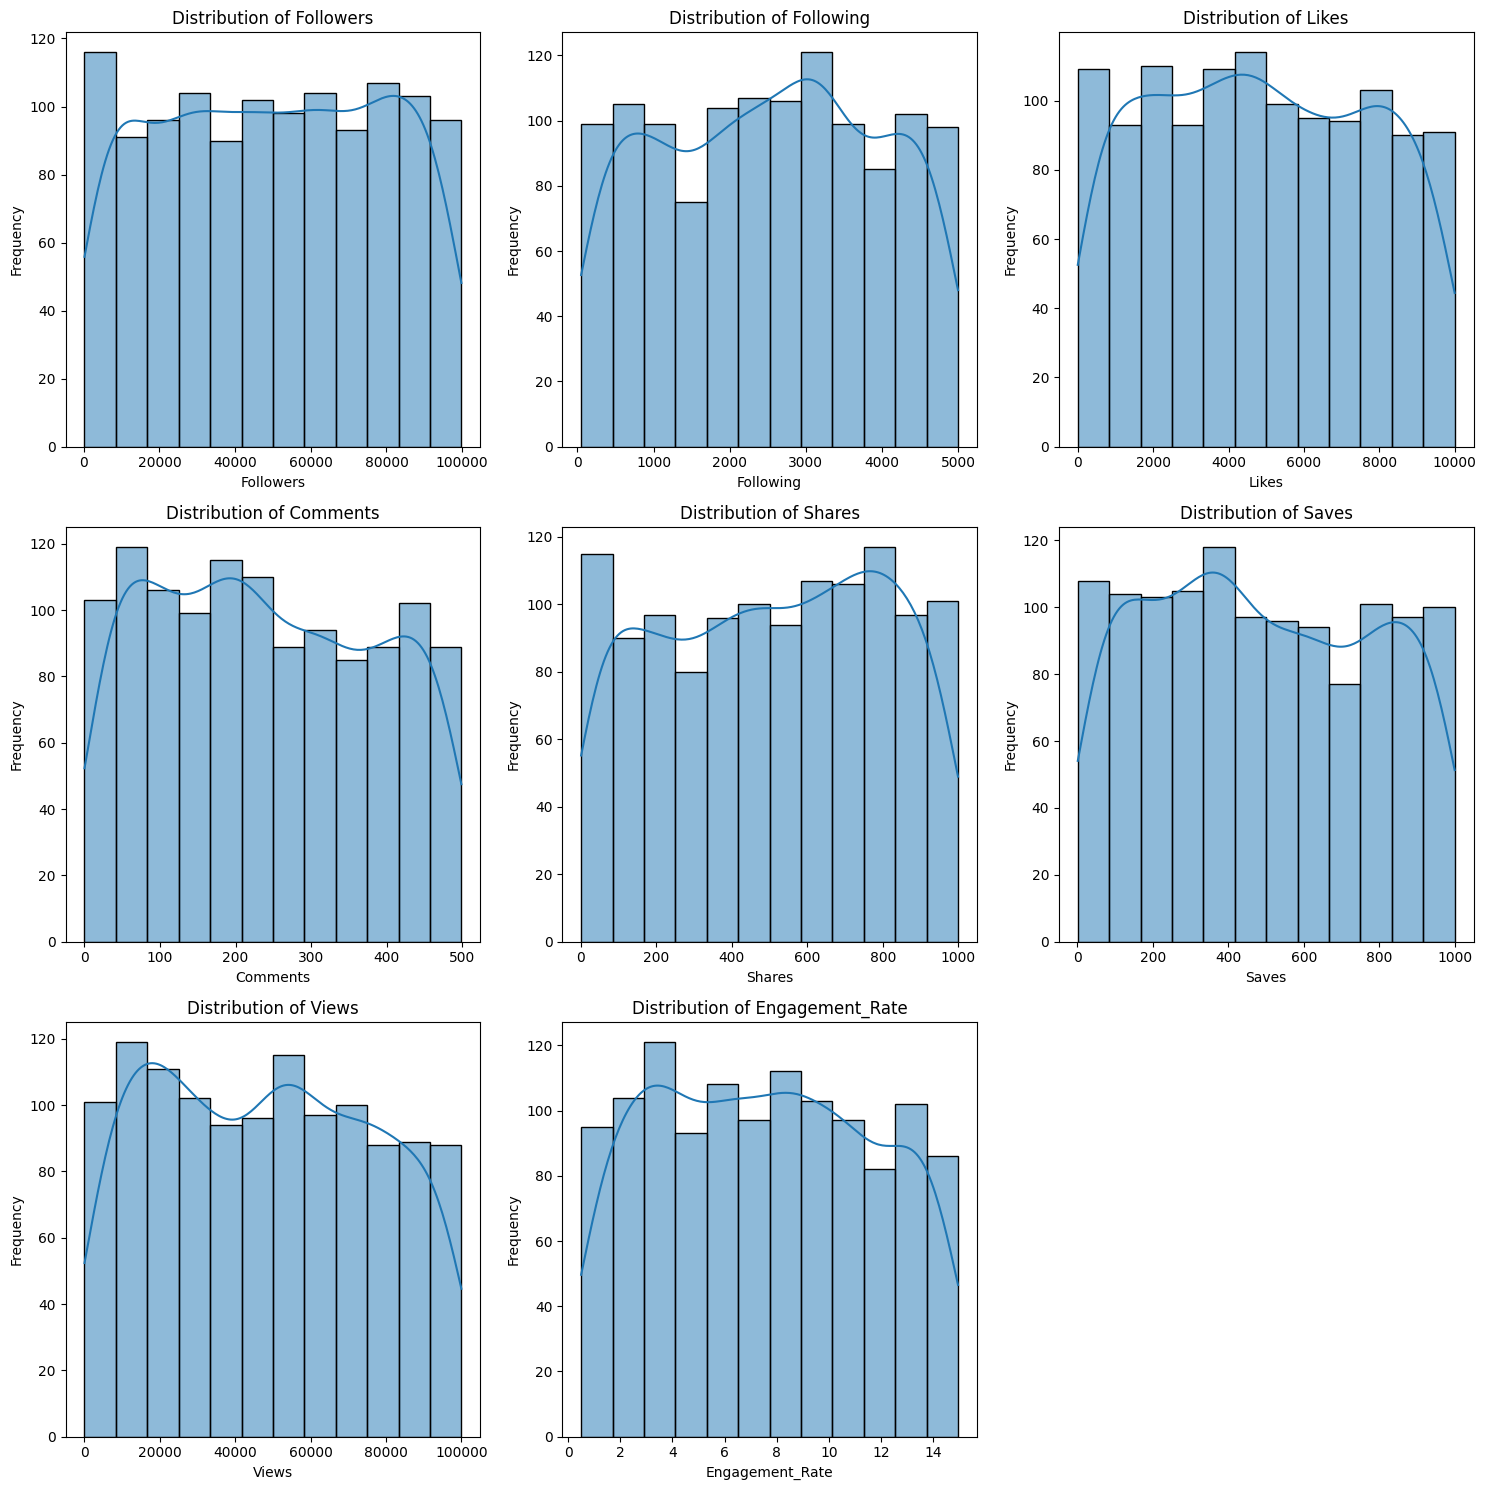

In [ ]:
# Print the names of the columns in the DataFrame
print("Columns in the DataFrame:")
print(df.columns.values)

# Select only numerical columns for plotting
numerical_cols = df.select_dtypes(include=np.number).columns

# Create a figure and a set of subplots
# Adjusting the grid size based on the number of numerical columns
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on rows

for i,col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Engagement Rate**

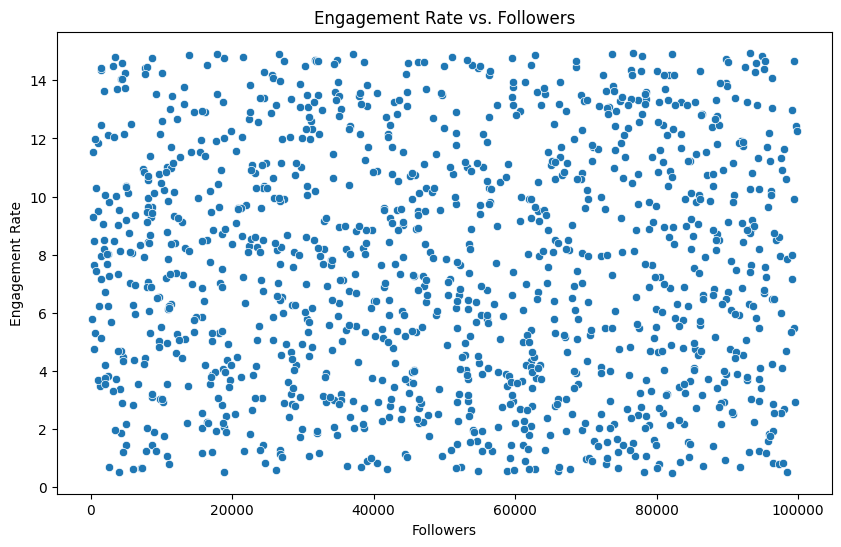

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Followers', y='Engagement_Rate', data=df)
plt.title('Engagement Rate vs. Followers')
plt.xlabel('Followers')
plt.ylabel('Engagement Rate')
plt.show()